# Multilayer perceptron in TensorFlow (plain vanilla)

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import cPickle as pickle
import gzip
import time
import tensorflow as tf
import pandas as pd
tf.set_random_seed(1)
np.random.seed(1)

with gzip.open('../../lasagne/mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read

# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

((4000, 1, 28, 28), (4000,), 28)


(4000, 784)

In [2]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

## Building the network
Build a network with the following architecture.

### Definition of the network (architecture)

* An Input Layer with the following 2-dimensions: 
    * 0: Batch Size yet unkown hence `None`
    * 1: 784 = 28*28 pixels
* A hidden layer with 500 units
* A second hidden layer with 50 units
* An output layer with 10 units

### Hints
* The weights can be specified and intitialized as
```{python}
    w_1 = tf.Variable(tf.random_normal([784, 500]))
```
* Use ```tf.nn.sigmoid``` activations for the hidden layer

In [3]:
tf.reset_default_graph()
tf.set_random_seed(1)
x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

# From Input to first hidden layer
w_1 = tf.Variable(tf.random_normal([784, 500], stddev=0.1))
b_1 = tf.Variable(tf.random_normal([500]))
h_1_in = tf.add(tf.matmul(x, w_1), b_1)
h_1_out = tf.nn.relu(h_1_in)

# From first hidden layer to second hidden layer
# <--- Your code here --->
w_2 = tf.Variable(tf.random_normal([500, 50], stddev=0.1))
b_2 = tf.Variable(tf.random_normal([50]))
h_2_in = tf.add(tf.matmul(h_1_out, w_2), b_2)
h_2_out = tf.nn.relu(h_2_in)
# <--- End of your code here --->

# From second hidden layer to output
w_3 = tf.Variable(tf.random_normal([50, 10], stddev=0.1))
b_3 = tf.Variable(tf.random_normal([10]))
h_3_in = tf.add(tf.matmul(h_2_out, w_3), b_3)

# Output is softmax
out = tf.nn.softmax(h_3_in)
init_op = tf.global_variables_initializer() 

### Store the graph and visualize it in tensorflow

In [4]:
tf.summary.FileWriter("/tmp/dumm/mlp_tensorflow_solution/", tf.get_default_graph()).close() #<--- Where to store

### Doing a forward pass of the untrained network
Since we fixed the random seed, you should you should get a result like:

In [5]:
with tf.Session() as sess:
    sess.run(init_op)
    res_val = sess.run(out, feed_dict={x:X[0:2]})
res_val

array([[  2.89549232e-01,   6.02805465e-02,   5.36485866e-04,
          3.27582695e-02,   3.45717650e-04,   2.12644130e-01,
          1.91141307e-01,   1.51388312e-03,   1.65578678e-01,
          4.56517488e-02],
       [  4.15045202e-01,   8.72126669e-02,   2.26489659e-02,
          7.13404343e-02,   6.83235144e-03,   5.74614033e-02,
          7.40540475e-02,   1.08420523e-02,   2.10118622e-01,
          4.44443673e-02]], dtype=float32)

### Train the model

In [6]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(out), reduction_indices=[1]))
# <---- Your code here (fix the optimzer)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer() 
vals = []
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(4000):
        idx = np.random.permutation(2400)[0:128] #Easy minibatch of size 128
        loss_, _, res_ = sess.run((loss, train_op,out), feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        if (i % 100 == 0):
            # Get the results for the validation results (from 2400:3000)
            # <---------   Your code here -----------------
            acc = np.average(np.argmax(res_, axis = 1) == y[idx])
            loss_v, res_val = sess.run([loss, out], feed_dict={x:X[2400:3000], y_true:convertToOneHot(y[2400:3000], 10)})
            acc_v = np.average(np.argmax(res_val, axis = 1) == y[2400:3000])
            # <---------  End of your code here
            vals.append([loss_, acc, loss_v, acc_v])
            print("{} Training: loss {} acc {} Validation: loss {} acc {}".format(i, loss_, acc, loss_v, acc_v))

0 Training: loss 3.42084741592 acc 0.140625 Validation: loss 3.239569664 acc 0.0966666666667
100 Training: loss 0.712276875973 acc 0.78125 Validation: loss 0.806696176529 acc 0.775
200 Training: loss 0.401534080505 acc 0.90625 Validation: loss 0.573695719242 acc 0.831666666667
300 Training: loss 0.350057572126 acc 0.90625 Validation: loss 0.491815596819 acc 0.846666666667
400 Training: loss 0.244123607874 acc 0.9375 Validation: loss 0.470033019781 acc 0.853333333333
500 Training: loss 0.222910642624 acc 0.9296875 Validation: loss 0.445216119289 acc 0.861666666667
600 Training: loss 0.111224099994 acc 0.9921875 Validation: loss 0.428535908461 acc 0.871666666667
700 Training: loss 0.201933711767 acc 0.9609375 Validation: loss 0.427164167166 acc 0.871666666667
800 Training: loss 0.19144320488 acc 0.9765625 Validation: loss 0.419657230377 acc 0.88
900 Training: loss 0.180035412312 acc 0.953125 Validation: loss 0.417782068253 acc 0.885
1000 Training: loss 0.171941012144 acc 0.96875 Validati

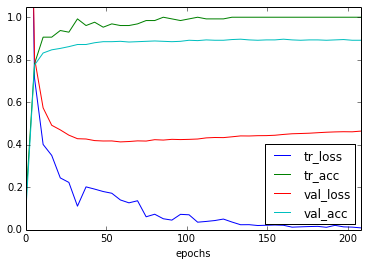

In [7]:
vals_df = pd.DataFrame(vals)
vals_df.columns = ['tr_loss', 'tr_acc', 'val_loss', 'val_acc']
vals_df['epochs'] = (np.asarray(range(len(vals_df))) * 100.0 * 128. / 2400)
vals_df.plot(ylim = (0,1.05), x='epochs')